In [21]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as pl

In [2]:
from pathlib import Path


In [3]:
DATA_PATH = Path("..") / "data" / "/content/project_data.xlsx"

In [4]:
# -----------------------
# LOAD
# -----------------------
df = pd.read_excel(DATA_PATH)

In [5]:
# -----------------------
# QUICK CLEAN (safe + general)
# -----------------------
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]



In [6]:
possible_numeric = [
    "length_of_stay", "total_charges", "total_costs", "cost_charge_ratio"
]
for col in possible_numeric:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

In [7]:
# Drop rows missing the key metrics (keep it strict for clean visuals)
key_cols = [c for c in ["total_costs", "total_charges", "length_of_stay"] if c in df.columns]
df = df.dropna(subset=key_cols).copy()

# Basic sanity caps (optional): remove impossible negatives
for col in ["total_costs", "total_charges", "length_of_stay"]:
    if col in df.columns:
        df = df[df[col] >= 0]


In [24]:
# =========================
# COLUMN MAPPING (REQUIRED)
# =========================

# print columns so you can see them
print("All columns in dataset:")
print(df.columns.tolist())

# ---- COST column ----
if "total_costs" in df.columns:
    COL_COST = "total_costs"
elif "total_cost" in df.columns:
    COL_COST = "total_cost"
elif "costs" in df.columns:
    COL_COST = "costs"
else:
    COL_COST = None

# ---- SEVERITY column ----
if "severity_of_illness" in df.columns:
    COL_SEVERITY = "severity_of_illness"
elif "severity" in df.columns:
    COL_SEVERITY = "severity"
else:
    COL_SEVERITY = None

print("Detected COL_COST:", COL_COST)
print("Detected COL_SEVERITY:", COL_SEVERITY)



All columns in dataset:
['length_of_stay', 'age_group', 'gender', 'race', 'ethnicity', 'type_of_admission', 'emergency_department_indicator', 'zip_code_-_3_digits', 'ccs_diagnosis_description', 'ccs_diagnosis_code', 'ccs_procedure_description', 'ccs_procedure_code', 'payment_typology_1', 'payment_typology_2', 'payment_typology_3', 'hospital_service_area', 'hospital_county', 'operating_certificate_number', 'permanent_facility_id', 'patient_disposition', 'discharge_year', 'apr_drg_code', 'apr_drg_description', 'apr_mdc_code', 'apr_mdc_description', 'apr_severity_of_illness_code', 'apr_severity_of_illness_description', 'apr_risk_of_mortality', 'apr_medical_surgical_description', 'birth_weight', 'abortion_edit_indicator', 'total_charges', 'total_costs', 'ratio_of_total_costs_to_total_charges']
Detected COL_COST: total_costs
Detected COL_SEVERITY: None


In [8]:
display(df.head())
print(df.shape)
print(df.columns.tolist())

,length_of_stay,age_group,gender,race,ethnicity,type_of_admission,emergency_department_indicator,zip_code_-_3_digits,ccs_diagnosis_description,ccs_diagnosis_code,...,apr_mdc_description,apr_severity_of_illness_code,apr_severity_of_illness_description,apr_risk_of_mortality,apr_medical_surgical_description,birth_weight,abortion_edit_indicator,total_charges,total_costs,ratio_of_total_costs_to_total_charges
0,3.0,30 to 49,M,Multi-racial,Not Span/Hispanic,Elective,Y,128,Diagnosis 19,103,...,APR MDC 03,1,Minor,Moderate,Medical,NaN,N,26036.14,18359.19,0.7051
1,19.0,30 to 49,M,Other Race,Not Span/Hispanic,Elective,N,100,Diagnosis 14,101,...,APR MDC 01,3,Major,Major,Surgical,NaN,N,25660.69,14904.44,0.5808
2,16.0,30 to 49,M,White,Unknown,Emergency,N,149,Diagnosis 19,284,...,APR MDC 03,4,Moderate,Major,Medical,NaN,N,26773.34,6222.96,0.2324
3,11.0,0 to 17,F,White,Not Span/Hispanic,Emergency,Y,129,Diagnosis 20,214,...,APR MDC 01,4,Moderate,Minor,Medical,NaN,N,14600.06,8008.65,0.5485
4,11.0,50 to 69,F,White,Spanish/Hispanic,Emergency,N,130,Diagnosis 17,72,...,APR MDC 07,1,Minor,Moderate,Medical,NaN,N,26065.38,18657.62,0.7158


(990, 34)
['length_of_stay', 'age_group', 'gender', 'race', 'ethnicity', 'type_of_admission', 'emergency_department_indicator', 'zip_code_-_3_digits', 'ccs_diagnosis_description', 'ccs_diagnosis_code', 'ccs_procedure_description', 'ccs_procedure_code', 'payment_typology_1', 'payment_typology_2', 'payment_typology_3', 'hospital_service_area', 'hospital_county', 'operating_certificate_number', 'permanent_facility_id', 'patient_disposition', 'discharge_year', 'apr_drg_code', 'apr_drg_description', 'apr_mdc_code', 'apr_mdc_description', 'apr_severity_of_illness_code', 'apr_severity_of_illness_description', 'apr_risk_of_mortality', 'apr_medical_surgical_description', 'birth_weight', 'abortion_edit_indicator', 'total_charges', 'total_costs', 'ratio_of_total_costs_to_total_charges']


Q1. How are total hospital costs distributed, and where do extreme cost outliers occur?

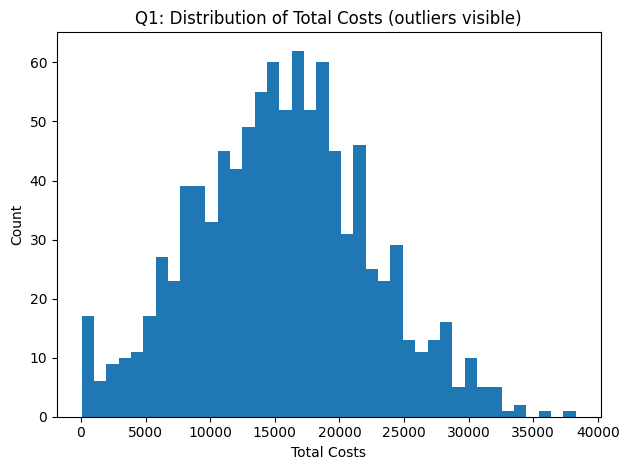

In [9]:
plt.figure()
plt.hist(df["total_costs"], bins=40)
plt.title("Q1: Distribution of Total Costs (outliers visible)")
plt.xlabel("Total Costs")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

Q2. How does length of stay influence total cost, and does this relationship change across admission types?

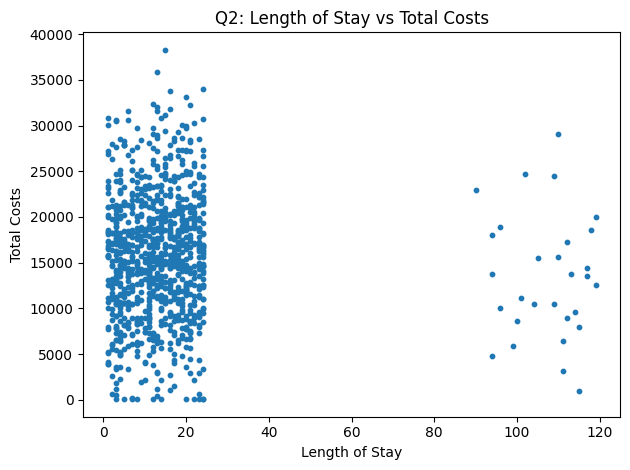

In [10]:
# 2) Length of stay vs total cost (relationship)
plt.figure()
plt.scatter(df["length_of_stay"], df["total_costs"], s=10)
plt.title("Q2: Length of Stay vs Total Costs")
plt.xlabel("Length of Stay")
plt.ylabel("Total Costs")
plt.tight_layout()
plt.show()

Q3. Which admission types (emergency, urgent, elective, newborn) generate the highest average costs and longest stays?

In [12]:
# -----------------------
# COLUMN DETECTION (MUST RUN FIRST)
# -----------------------
COL_ADMISSION = "type_of_admission" if "type_of_admission" in df.columns else None
COL_SEVERITY  = "severity_of_illness" if "severity_of_illness" in df.columns else None
COL_DIAG      = "diagnosis" if "diagnosis" in df.columns else None
COL_AGE       = "age_group" if "age_group" in df.columns else None
COL_MORT_RISK = "risk_of_mortality" if "risk_of_mortality" in df.columns else None

print("Detected columns:")
print("Admission:", COL_ADMISSION)
print("Severity:", COL_SEVERITY)
print("Diagnosis:", COL_DIAG)
print("Age:", COL_AGE)
print("Mortality risk:", COL_MORT_RISK)


Detected columns:
Admission: type_of_admission
Severity: None
Diagnosis: None
Age: age_group
Mortality risk: None


In [13]:
# 3) Admission type: avg cost + avg LOS (2-in-1 chart: use cost only OR LOS only per question)
if COL_ADMISSION:
    agg = df.groupby(COL_ADMISSION).agg(
        avg_cost=("total_costs", "mean"),
        avg_los=("length_of_stay", "mean"),
        n=("total_costs", "size")
    ).reset_index()

Q4. How does severity of illness relate to total cost and length of stay?

/tmp/ipython-input-24371245.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showfliers=False)


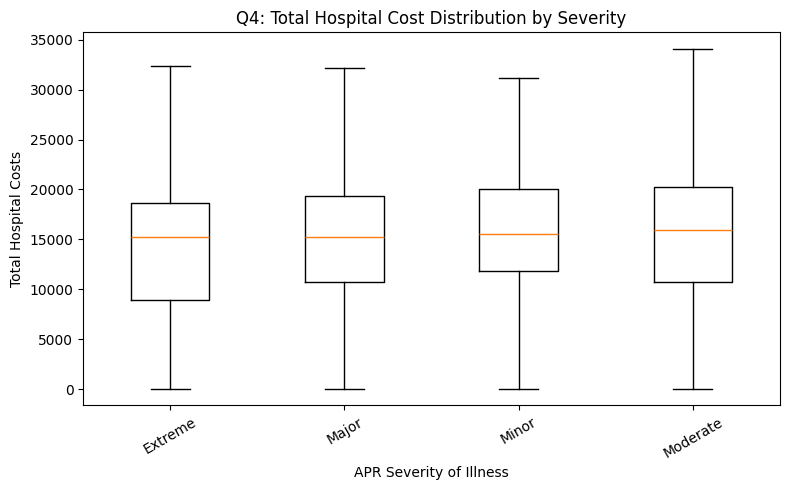

In [27]:
# Q4: Box plot — Total Hospital Costs by Severity of Illness

plt.figure(figsize=(8, 5))

# Corrected column name: 'total_costs' instead of 'Total Costs'
df["total_costs"] = pd.to_numeric(df["total_costs"], errors="coerce")

# Corrected column name: 'apr_severity_of_illness_description'
sub = df.dropna(subset=["total_costs", "apr_severity_of_illness_description"])

data = []
labels = []

for sev, g in sub.groupby("apr_severity_of_illness_description"):
    data.append(g["total_costs"].values)
    labels.append(sev)

plt.boxplot(data, tick_labels=labels, showfliers=False)
plt.xlabel("APR Severity of Illness")
plt.ylabel("Total Hospital Costs")
plt.title("Q4: Total Hospital Cost Distribution by Severity")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

Q5. Do patients with similar severity levels incur different costs depending on admission type?

In [15]:
# 5) Same severity, different admission type → cost difference (heatmap-like pivot)
if COL_SEVERITY and COL_ADMISSION:
    pivot = df.pivot_table(
        index=COL_SEVERITY,
        columns=COL_ADMISSION,
        values="total_costs",
        aggfunc="mean"
    )
    plt.figure()
    plt.imshow(pivot.values, aspect="auto")
    plt.title("Q5: Avg Total Costs (Severity x Admission Type)")
    plt.xlabel("Admission Type")
    plt.ylabel("Severity")
    plt.xticks(range(len(pivot.columns)), [str(c) for c in pivot.columns], rotation=30, ha="right")
    plt.yticks(range(len(pivot.index)), [str(i) for i in pivot.index])
    plt.colorbar(label="Avg Total Costs")
    plt.tight_layout()
    plt.show()


Q6. Which diagnosis categories contribute disproportionately to total hospital costs?

In [16]:
# 6) Diagnosis groups contributing most to total cost (Pareto-style top N)
if COL_DIAG:
    top_diag = top_n_by_sum(df, COL_DIAG, "total_costs", n=12)
    plt.figure()
    plt.bar(top_diag[COL_DIAG].astype(str), top_diag["total_costs"])
    plt.title("Q6: Top Diagnosis Categories by Total Costs (Top 12)")
    plt.xlabel("Diagnosis Category")
    plt.ylabel("Sum of Total Costs")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

Q7. Where do we observe the largest gaps between charges and actual costs (cost–charge ratio)?

In [17]:
# 7) Gap between charges and costs (cost-charge ratio) distribution
if "cost_charge_ratio" in df.columns:
    plt.figure()
    plt.hist(df["cost_charge_ratio"].dropna(), bins=40)
    plt.title("Q7: Distribution of Cost–Charge Ratio (inefficiency indicator)")
    plt.xlabel("Cost–Charge Ratio")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

Q8. Are high cost–charge ratios associated with specific diagnoses, admission types, or severity levels?

/tmp/ipython-input-117085914.py:34: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showfliers=False)


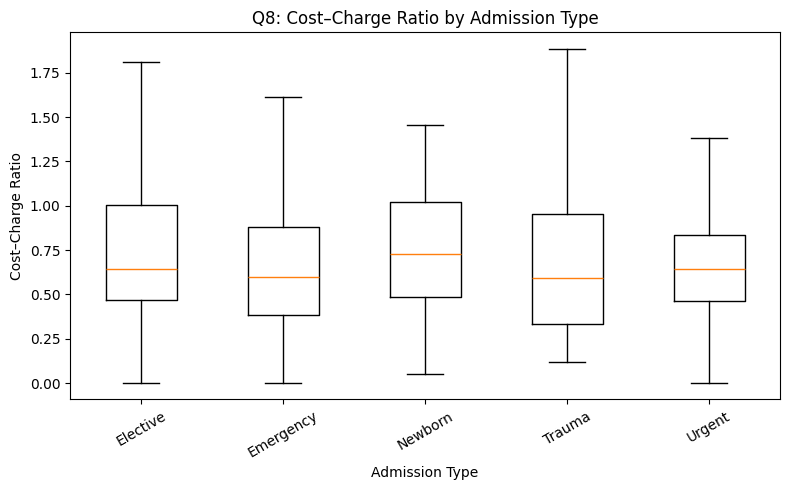

In [28]:
# Q8: Box plot — Cost–Charge Ratio by Admission Type (SAFE)

import matplotlib.pyplot as plt
import pandas as pd

# --- auto-detect columns (NO hardcoding) ---
def find_col(keywords):
    for c in df.columns:
        name = c.lower()
        if all(k in name for k in keywords):
            return c
    return None

COL_CCR = find_col(["cost", "charge"])      # cost–charge ratio
COL_ADM = find_col(["admission"])           # admission type

# force numeric if found
if COL_CCR:
    df[COL_CCR] = pd.to_numeric(df[COL_CCR], errors="coerce")

# proceed only if both exist
if COL_CCR is None or COL_ADM is None:
    print("Q8 skipped: required columns not found.")
else:
    sub = df.dropna(subset=[COL_CCR, COL_ADM])

    data, labels = [], []
    for k, g in sub.groupby(COL_ADM):
        if len(g) > 0:
            data.append(g[COL_CCR].values)
            labels.append(str(k))

    plt.figure(figsize=(8,5))
    plt.boxplot(data, labels=labels, showfliers=False)
    plt.xlabel("Admission Type")
    plt.ylabel("Cost–Charge Ratio")
    plt.title("Q8: Cost–Charge Ratio by Admission Type")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()


Q9. Are high cost–charge ratios associated with specific diagnoses, admission types, or severity levels?

In [19]:
# 9) Patient profiles: (age x severity x admission) -> avg cost (we'll do age x severity heatmap)
if COL_AGE and COL_SEVERITY:
    pivot2 = df.pivot_table(
        index=COL_AGE,
        columns=COL_SEVERITY,
        values="total_costs",
        aggfunc="mean"
    )
    plt.figure()
    plt.imshow(pivot2.values, aspect="auto")
    plt.title("Q9: Avg Total Costs (Age Group x Severity)")
    plt.xlabel("Severity")
    plt.ylabel("Age Group")
    plt.xticks(range(len(pivot2.columns)), [str(c) for c in pivot2.columns], rotation=30, ha="right")
    plt.yticks(range(len(pivot2.index)), [str(i) for i in pivot2.index])
    plt.colorbar(label="Avg Total Costs")
    plt.tight_layout()
    plt.show()

Q10. What combination of factors defines the top 10% most expensive hospital cases?

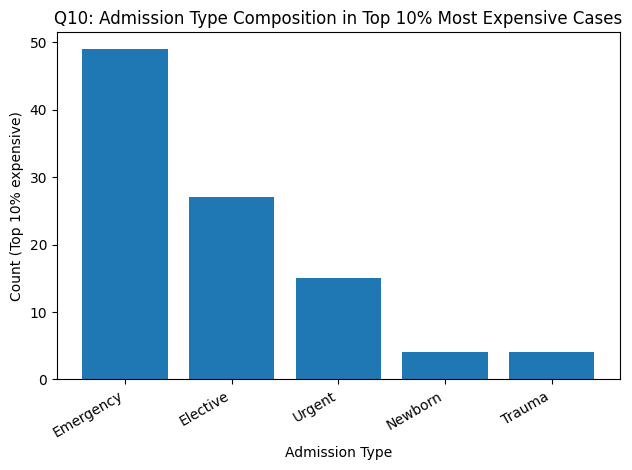

In [20]:
# 10) Top 10% most expensive: what factors dominate? (bar of admission types in top 10%)
threshold = df["total_costs"].quantile(0.90)
df_top = df[df["total_costs"] >= threshold].copy()

if COL_ADMISSION:
    counts = df_top[COL_ADMISSION].astype(str).value_counts()
    plt.figure()
    plt.bar(counts.index, counts.values)
    plt.title("Q10: Admission Type Composition in Top 10% Most Expensive Cases")
    plt.xlabel("Admission Type")
    plt.ylabel("Count (Top 10% expensive)")
    plt.xticks(rotation=30, ha="right")
    plt.tight_layout()
    plt.show()